### Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [4]:
X[1].min(), X[1].max()

(0, 10)

In [5]:
X[2].min(), X[2].max()

(450, 2000)

In [6]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [7]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 5.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [8]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.5       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

Стандартизация

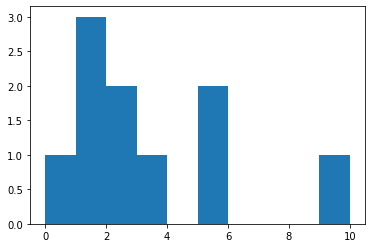

In [9]:
plt.hist(X[1])
plt.show()

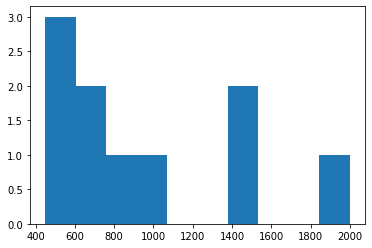

In [10]:
plt.hist(X[2])
plt.show()

In [11]:
X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()
print(X1_mean, X1_std)

3.0 2.8284271247461903


In [12]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-7.07106781e-01, -7.07106781e-01, -3.53553391e-01,
         7.07106781e-01,  0.00000000e+00, -1.06066017e+00,
         7.07106781e-01,  2.47487373e+00, -7.07106781e-01,
        -3.53553391e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

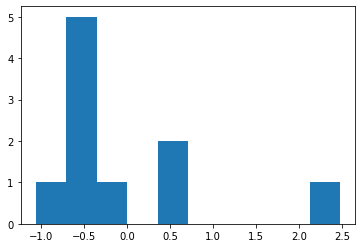

In [13]:
plt.hist(X_st[1])
plt.show()

In [14]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [15]:
X_st[2] = calc_std_fit(X[2])

In [16]:
X_st[3] = calc_std_fit(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

SGD (Stochastic gradient descent)

In [17]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [18]:
W = np.random.randn(X.shape[0])
W

array([-0.34708806,  0.62149222,  0.36888845, -0.4119589 ])

In [19]:
# классический  GD
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [20]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

100 [48.93817342  5.59360371  1.6926775   5.08859074] 85.17756488692028
200 [55.49715392  5.81453126  1.30865664  5.33374085] 26.424397976892816
300 [56.367003    5.94534594  0.98828463  5.53706394] 25.233273243578314
400 [56.482362    6.03378191  0.73273592  5.7141677 ] 25.109933499455433
500 [56.49766086  6.09587189  0.52756184  5.86485146] 25.040486781624214
600 [56.49968978  6.14096751  0.36204409  5.99116864] 24.994791338944104
700 [56.49995886  6.17468296  0.22807603  6.09606117] 24.964505340085886
800 [56.49999454  6.20048639  0.11939755  6.18262722] 24.94440325103535
900 [5.64999993e+01 6.22059325e+00 3.10977402e-02 6.25377854e+00] 24.93105242164494
1000 [ 5.64999999e+01  6.23647204e+00 -4.07205989e-02  6.31210185e+00] 24.922182953616602


array([ 5.64999999e+01,  6.23647204e+00, -4.07205989e-02,  6.31210185e+00])

In [21]:
# стохастический GS
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
#             print(b, n_batch, start_, end_)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]

            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)

            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [22]:
eval_sgd_model(X_st, y, iterations=50000, qty_in_batch=4, alpha=1e-2)

5000 [56.5106203   6.31269032 -0.36443476  6.58449642] 11.289387264803985
10000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289182006780864
15000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330403
20000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
25000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
30000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
35000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
40000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
45000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
50000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424


array([56.51062035,  6.31272262, -0.3645908 ,  6.58462533])

L1 регуляризация

L2 регуляризация

In [23]:
# lambda = lambda_/2

In [24]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [25]:
W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

In [26]:
W

array([56.49717514,  6.30231751, -0.35424091,  6.56978425])

In [27]:
eval_model(X_st, y, iterations=5000, alpha=1e-2)

500 [56.49767254  5.83477719  1.36781865  5.25424451] 25.41382962551479
1000 [56.4999999   6.17124081  0.25269258  6.07416416] 24.969784391475404
1500 [56.5         6.2575128  -0.13774522  6.39128671] 24.913059475565486
2000 [56.5         6.28678323 -0.27772011  6.50655795] 24.90571241785009
2500 [56.5         6.29722767 -0.32807425  6.54810646] 24.904760553791704
3000 [56.5         6.30098239 -0.34619733  6.56306445] 24.904637232271696
3500 [56.5         6.30233363 -0.3527205   6.5684486 ] 24.904621254991188
4000 [56.5         6.30281999 -0.35506846  6.57038658] 24.904619185007853
4500 [56.5         6.30299505 -0.35591359  6.57108415] 24.904618916825108
5000 [56.5         6.30305806 -0.35621778  6.57133523] 24.904618882079912


array([56.5       ,  6.30305806, -0.35621778,  6.57133523])

## Д/з

* Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока). Сделайте вывод

In [28]:
W_all = []
for lambda_ in np.linspace(-3e-1, 3e-1, 100):
    W_all.append(eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=lambda_))

In [29]:
W_all = np.array(W_all)

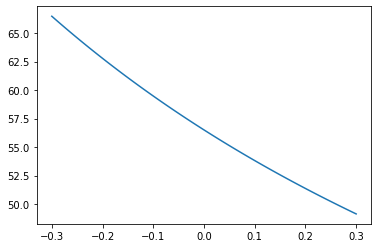

In [30]:
plt.plot(np.linspace(-3e-1, 3e-1, 100), W_all[:, 0])

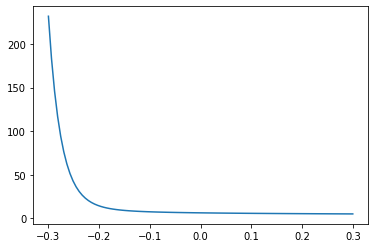

In [31]:
plt.plot(np.linspace(-3e-1, 3e-1, 100), W_all[:, 1])

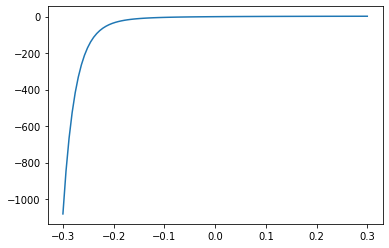

In [32]:
plt.plot(np.linspace(-3e-1, 3e-1, 100), W_all[:, 2])

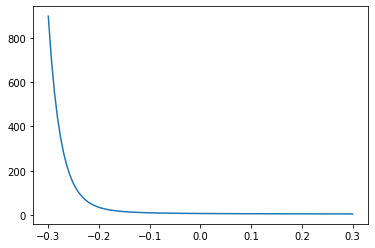

In [33]:
plt.plot(np.linspace(-3e-1, 3e-1, 100), W_all[:, 3])

* Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Т.к. "В общем случае, когда выбор метода неочевиден, полезной практикой считается создавать масштабированные копии набора данных, с которыми работает специалист, и сравнивать друг с другом полученные после применения модели результаты для выявления оптимального метода масштабирования для имеющейся ситуации" то можно предположить, что данное действие либо не имеет смысла, либо даже приведет к ухудшению результата

* Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [34]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ / 2 * W / np.abs(W)) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [35]:
eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

500 [56.49767752  5.89984286  1.03995643  5.52754426] 25.23722865621234
1000 [56.49997491  6.1955879   0.13438465  6.17193776] 24.946863213425125
1500 [56.499975    6.26626155 -0.18018704  6.42634957] 24.91009882610376
2000 [56.499975    6.28986857 -0.29280647  6.51903896] 24.905332979790995
2500 [56.499975    6.29827353 -0.33331393  6.55245994] 24.904712893089584
3000 [56.499975    6.30129411 -0.34789276  6.56449252] 24.904631605764482
3500 [56.499975    6.3023811  -0.35314022  6.5688237 ] 24.90462073232084
4000 [56.499975    6.30277234 -0.35502899  6.57038268] 24.90461920046988
4500 [56.499975    6.30291316 -0.35570884  6.57094382] 24.904618957693984
5000 [56.499975    6.30296385 -0.35595354  6.5711458 ] 24.904618910290516


array([56.499975  ,  6.30296385, -0.35595354,  6.5711458 ])